In [9]:
pip install pydeck

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\.conda\envs\my_env\python.exe -m pip install --upgrade pip' command.


In [10]:
import pydeck as pdk

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import folium
import webbrowser
from folium import plugins
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname='C:/Windows/Fonts/H2GSRB.TTF').get_name()
mpl.rc('font', family=font_name)

In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.Successfully installed branca-0.4.2 folium-0.12.1



You should consider upgrading via the 'C:\Users\user\.conda\envs\my_env\python.exe -m pip install --upgrade pip' command.


In [92]:
import pandas as pd

korea= gpd.GeoDataFrame.from_file('시군구/SIG2.shp', encoding='cp949')

In [100]:
mm=folium.Map(location=[35.8,127.6], tiles="OpenStreetMap", zoom_start=8)
mm

In [93]:
#전국 시군구 geo
korea

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.58509 38.08062, 127.58566 38.080..."
1,42130,Wonju-si,원주시,"POLYGON ((127.93580 37.50246, 127.93618 37.502..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((129.04785 37.64961, 129.04788 ..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((129.08794 37.59500, 129.08789 ..."
4,42190,Taebaek-si,태백시,"POLYGON ((129.01252 37.33636, 129.01245 37.336..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((127.53733 36.80859, 127.53797 36.808..."
246,43750,Jincheon-gun,진천군,"POLYGON ((127.44138 37.01190, 127.44193 37.011..."
247,43760,Goesan-gun,괴산군,"POLYGON ((127.80067 36.94755, 127.80079 36.947..."
248,43770,Eumseong-gun,음성군,"POLYGON ((127.62988 37.15424, 127.62987 37.154..."


In [123]:
#AI발생지 불러오기
local3= pd.read_csv('전국 발생지(0908).csv', dtype=str)
local3.head(2)

,SIG_CD,시도,시군구,월,x,y,xy
0,42810,강원도,인제군,1,128.1703515,38.06970974,"128.170351505777,38.069709741838"
1,42730,강원도,횡성군,1,127.98508,37.49178316,"127.985079956092,37.4917831601354"


In [26]:
#전국 시군구 json불러오기
dd = gpd.read_file('시군구/SIG2.json')

In [21]:
dd.head(2)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.58509 38.08062, 127.58474 38.080..."
1,42130,Wonju-si,원주시,"POLYGON ((127.93580 37.50246, 127.93525 37.502..."


In [18]:
#dd geometry 좌표 확인
dd.geometry.centroid

<ipython-input-18-35d423d6f184>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dd.geometry.centroid


0      POINT (127.73995 37.88985)
1      POINT (127.92954 37.30826)
2      POINT (128.83222 37.70920)
3      POINT (129.05564 37.50673)
4      POINT (128.98006 37.17237)
                  ...            
245    POINT (127.60460 36.78649)
246    POINT (127.44043 36.87102)
247    POINT (127.82958 36.76969)
248    POINT (127.61418 36.97626)
249    POINT (128.38789 36.99451)
Length: 250, dtype: geometry

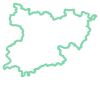

In [27]:
dd.geometry[0].boundary

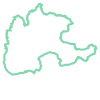

In [28]:
dd.geometry[1].boundary

In [124]:
#전국 AI발생지 x,y를 geo화 하기
local33 = gpd.GeoDataFrame(local3, geometry=gpd.points_from_xy(local2.x,local2.y))
print(local33.head())

  SIG_CD   시도   시군구  월            x            y  \
0  42810  강원도   인제군  1  128.1703515  38.06970974   
1  42730  강원도   횡성군  1    127.98508  37.49178316   
2  41610  경기도   광주시  1  127.2551387  37.42939419   
3  41570  경기도   김포시  1  126.7156579  37.61526869   
4  41360  경기도  남양주시  1  127.2164803  37.63602723   

                                  xy                    geometry  
0   128.170351505777,38.069709741838  POINT (128.17035 38.06971)  
1  127.985079956092,37.4917831601354  POINT (127.98508 37.49178)  
2  127.255138719721,37.4293941934866  POINT (127.25514 37.42939)  
3  126.715657922927,37.6152686898333  POINT (126.71566 37.61527)  
4   127.21648030719,37.6360272346499  POINT (127.21648 37.63603)  


In [125]:
local33

,SIG_CD,시도,시군구,월,x,y,xy,geometry
0,42810,강원도,인제군,1,128.1703515,38.06970974,"128.170351505777,38.069709741838",POINT (128.17035 38.06971)
1,42730,강원도,횡성군,1,127.98508,37.49178316,"127.985079956092,37.4917831601354",POINT (127.98508 37.49178)
2,41610,경기도,광주시,1,127.2551387,37.42939419,"127.255138719721,37.4293941934866",POINT (127.25514 37.42939)
3,41570,경기도,김포시,1,126.7156579,37.61526869,"126.715657922927,37.6152686898333",POINT (126.71566 37.61527)
4,41360,경기도,남양주시,1,127.2164803,37.63602723,"127.21648030719,37.6360272346499",POINT (127.21648 37.63603)
...,...,...,...,...,...,...,...,...
102,46880,전라남도,장성군,12,126.7849189,35.30185768,"126.784918877012,35.3018576771354",POINT (126.78492 35.30186)
103,46900,전라남도,진도군,12,126.2634462,34.48682862,"126.263446186439,34.486828620348",POINT (126.26345 34.48683)
104,45190,전라북도,남원시,12,127.3903964,35.41636275,"127.390396427422,35.4163627529983",POINT (127.39040 35.41636)
105,44810,충청남도,예산군,12,126.8486422,36.6826228,"126.848642241312,36.6826228017861",POINT (126.84864 36.68262)


In [154]:
local33.to_csv('local33.csv', encoding='cp949')

In [ ]:
#전국 시군구와 전국 발생지 좌표계 확인 후 좌표 맞춰주기

In [126]:
print(local33.crs)

None


In [127]:
print(local33.columns)

Index(['SIG_CD', '시도', '시군구', '월', 'x', 'y', 'xy', 'geometry'], dtype='object')


In [128]:
print(dd2.crs)

epsg:3857


In [129]:
local33.crs = 'epsg:4326'

In [130]:
dd2 = dd2.to_crs('epsg:3857')

In [131]:
local33 = local33.to_crs('epsg:3857')

In [132]:
print(local33.crs)

epsg:3857


In [133]:
local22.crs = 'epsg:4326'
dd2 = dd2.to_crs('epsg:3857')

print(dd2.crs)

epsg:3857


In [89]:
print(dd2.geometry.area.head())

0    1.794024e+09
1    1.372789e+09
2    1.662538e+09
3    2.875825e+08
4    4.786251e+08
dtype: float64


In [40]:
dd2

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((14202706.752 4590821.443, 14202668.5..."
1,42130,Wonju-si,원주시,"POLYGON ((14241748.069 4509376.262, 14241687.3..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((14365541.457 4530044.682, 1436..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((14377826.006 4505715.415, 1437..."
4,42190,Taebaek-si,태백시,"POLYGON ((14350228.692 4448632.944, 14350235.2..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((14208576.168 4417614.033, 14208523.0..."
246,43750,Jincheon-gun,진천군,"POLYGON ((14187345.000 4440624.198, 14187344.8..."
247,43760,Goesan-gun,괴산군,"POLYGON ((14226705.267 4431798.961, 14226633.0..."
248,43770,Eumseong-gun,음성군,"POLYGON ((14201948.945 4418742.961, 14201948.9..."


In [122]:
dd2.to_csv('dd2.csv',encoding='cp949')

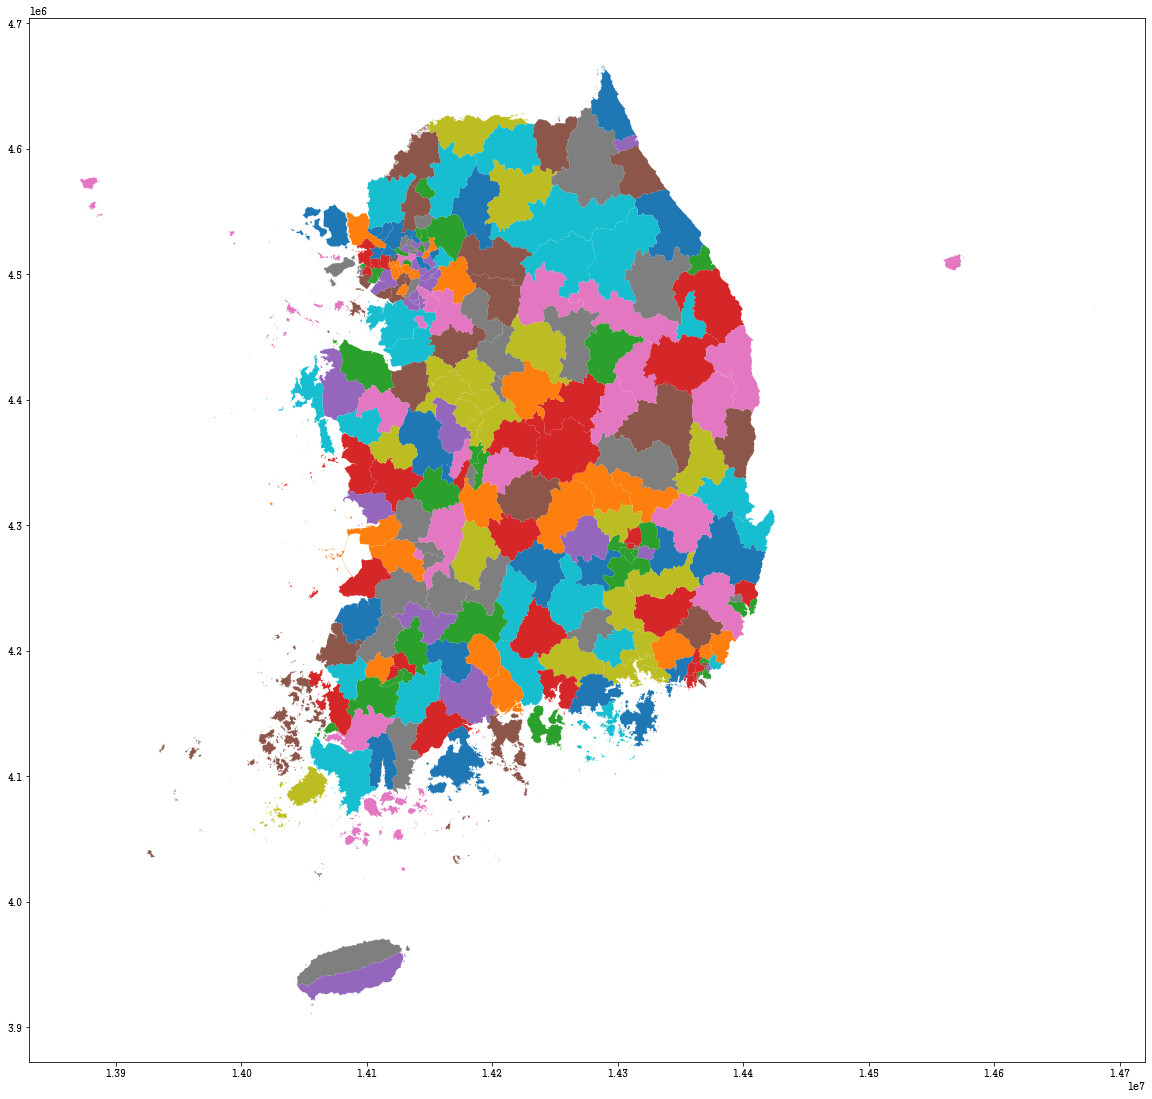

In [90]:
#전국 시군구 지도
ax = dd2.plot(column='SIG_KOR_NM', figsize=(20,20), alpha=1.0)

<function matplotlib.pyplot.show(close=None, block=None)>

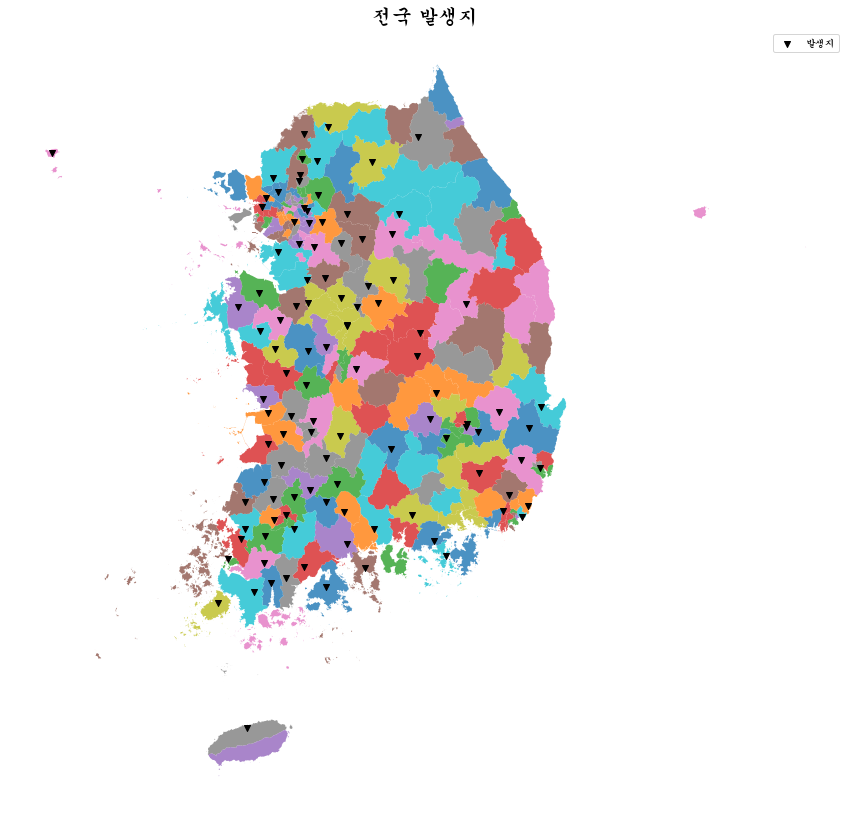

In [188]:
#전국 시군구에 발생지 표시하기
ax = dd2.plot(column='SIG_KOR_NM', figsize=(15,15), alpha=0.8)
local33.plot(ax=ax, marker='v', color='black', label='발생지')
ax.set_title("전국 발생지", fontsize=20)
ax.set_axis_off()
plt.legend()

plt.show

In [134]:
m = folium.Map(location=[36,127], tiles='OpenStreetMap', zoom_start=7)
m

In [137]:
m.choropleth(
    geo_data=local33,
    name='발생지',
    data=local33,
    columns=['SIG_CD', '월'],
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '발생지'
)

folium.LayerControl().add_to(m)

m.save('folium_kr.html')
webbrowser.open_new("folium_kr.html")

True

In [ ]:
#발생지 월별 시각화(하려던 파일 아직 생성못해서 이걸로 일단 되는지 봄)
#전국 시군구에 행정구역코드, 위험도 같이 들어있는 파일 있으면 될 듯

In [144]:
#행정구역 파일 가져오기
state_geo = gpd.GeoDataFrame.from_file('시군구/SIG2.json')

In [145]:
state_geo

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.58509 38.08062, 127.58474 38.080..."
1,42130,Wonju-si,원주시,"POLYGON ((127.93580 37.50246, 127.93525 37.502..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((129.04785 37.64961, 129.04781 ..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((129.15821 37.47636, 129.15821 ..."
4,42190,Taebaek-si,태백시,"POLYGON ((128.91030 37.06831, 128.91036 37.069..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((127.63781 36.84565, 127.63733 36.845..."
246,43750,Jincheon-gun,진천군,"POLYGON ((127.44709 37.01089, 127.44709 37.010..."
247,43760,Goesan-gun,괴산군,"POLYGON ((127.80067 36.94755, 127.80002 36.947..."
248,43770,Eumseong-gun,음성군,"POLYGON ((127.57828 36.85376, 127.57828 36.853..."


In [174]:
#발생지 데이터 로드
state_data = pd.read_csv('local33.csv', encoding='euc-kr')
state_data

,Unnamed: 0,SIG_CD,시도,시군구,월,x,y,xy,geometry
0,0,42810,강원도,인제군,1,128.170351,38.069710,"128.170351505777,38.069709741838",POINT (14267858.26377489 4589278.146975644)
1,1,42730,강원도,횡성군,1,127.985080,37.491783,"127.985079956092,37.4917831601354",POINT (14247233.93473638 4507878.509390133)
2,2,41610,경기도,광주시,1,127.255139,37.429394,"127.255138719721,37.4293941934866",POINT (14165977.2409114 4499129.00695324)
3,3,41570,경기도,김포시,1,126.715658,37.615269,"126.715657922927,37.6152686898333",POINT (14105922.51296265 4525217.844124892)
4,4,41360,경기도,남양주시,1,127.216480,37.636027,"127.21648030719,37.6360272346499",POINT (14161673.80750852 4528135.498380336)
...,...,...,...,...,...,...,...,...,...
102,102,46880,전라남도,장성군,12,126.784919,35.301858,"126.784918877012,35.3018576771354",POINT (14113632.61221449 4204978.437580858)
103,103,46900,전라남도,진도군,12,126.263446,34.486829,"126.263446186439,34.486828620348",POINT (14055582.53678789 4094360.046487946)
104,104,45190,전라북도,남원시,12,127.390396,35.416363,"127.390396427422,35.4163627529983",POINT (14181034.05920127 4220608.124332487)
105,105,44810,충청남도,예산군,12,126.848642,36.682623,"126.848642241312,36.6826228017861",POINT (14120726.25752215 4394960.345832366)


In [177]:
#필요없는 컬럼 삭제하고, 코드번호 숫자 인식돼서 오류 생기지 않게 zfill처리 함
state_data = state_data.drop(['Unnamed: 0','geometry','시도','시군구','x','y','xy'], axis=1)
state_data.columns=['SIG_CD', '월']
state_data['SIG_CD'] = state_data.SIG_CD.map(lambda x: str(x).zfill(5))
state_data.head(1)

,SIG_CD,월
0,42810,1


In [178]:
m = folium.Map(location=[36,127], tiles='OpenStreetMap', zoom_start=7)
m

In [ ]:
#https://plotly.com/python/builtin-colorscales/
#컬러 볼 수 있는 사이트

In [186]:
#색깔로 표시하기
m.choropleth(
    geo_data=state_geo,
    name='발생지',
    data=state_data,
    columns=['SIG_CD', '월'],
    key_on='feature.properties.SIG_CD',
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '발생지/월별'
)

folium.LayerControl().add_to(m)

# Save to html
m.save('folium_kr.html')
webbrowser.open_new("folium_kr.html")

True